**Цель работы:** приобрести опыт решения практических задач по анализу данных, таких как загрузка, трансформация, вычисление простых статистик и визуализация данных в виде графиков и диаграмм, посредством языка программирования Python.

**Вариант:**



In [1]:
surname = "Горский"  # Ваша фамилия

alp = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
w = [1, 42, 21, 21, 34,  6, 44, 26, 18, 44, 38, 26, 14, 43,  4, 49, 45,
        7, 42, 29,  4,  9, 36, 34, 31, 29,  5, 30,  4, 19, 28, 25, 33]

d = dict(zip(alp, w))
variant =  sum([d[el] for el in surname.lower()]) % 40 + 1

print("Задача № 1, шаг 5 - вариант: ", variant % 5 + 1)
print("Задача № 1, шаг 11 - вариант: ", variant % 2 + 1 )
print("задача № 2 - вариант: ", variant % 4 + 1)

Задача № 1, шаг 5 - вариант:  4
Задача № 1, шаг 11 - вариант:  1
задача № 2 - вариант:  1


### Задание 1. Анализ индикаторов качества государственного управления (The Worldwide Government Indicators, WGI) 

Подключение библиотек

In [2]:
#!pip install seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import seaborn as sn

1.Загрузка данных в DataFrame

In [3]:
# таблица regions
regions = pd.read_excel('regions.xlsx') 
regions

,Country,Code,Region
0,Afghanistan,AFG,AP
1,Albania,ALB,ECA
2,Algeria,DZA,MENA
3,Angola,AGO,SSA
4,Argentina,ARG,AME
...,...,...,...
175,Venezuela,VEN,AME
176,Vietnam,VNM,AP
177,Yemen,YEM,MENA
178,Zambia,ZMB,SSA


In [4]:
# таблица wgidataset
# загрузка листа ControlofCorruption, пропуск первых 13 строк, задание заголовка и индекса
df_wgidataset = pd.read_excel('wgidataset.xlsx', header=[0,1], sheet_name='ControlofCorruption', skiprows=13, index_col=[0,1]) 
df_wgidataset

1996                                         \
Code                  Estimate    StdErr NumSrc       Rank      Lower   
Aruba            ABW       NaN       NaN    NaN        NaN        NaN   
Andorra          ADO  1.318143  0.480889    1.0  87.096771  72.043015   
Afghanistan      AFG -1.291705  0.340507    2.0   4.301075   0.000000   
Angola           AGO -1.167702  0.262077    4.0   9.677420   0.537634   
Anguilla         AIA       NaN       NaN    NaN        NaN        NaN   
...                        ...       ...    ...        ...        ...   
Serbia           SRB -1.140072  0.262077    4.0  11.827957   0.537634   
South Africa     ZAF  0.732927  0.210325    6.0  76.344086  66.129036   
Congo, Dem. Rep. ZAR -1.647852  0.315914    3.0   0.000000   0.000000   
Zambia           ZMB -0.840641  0.262077    4.0  24.731182   5.913979   
Zimbabwe         ZWE -0.278847  0.244907    5.0  47.849461  30.645161   

                                     1998                              ...  \
Code                      Upper  Estimate    StdErr NumSrc       Rank  ...   
Aruba            ABW        NaN       NaN       NaN    NaN        NaN  ...   
Andorra          ADO  96.774193  1.334759  0.453149    1.0  89.304810  ...   
Afghanistan      AFG  27.419355 -1.176012  0.324013    2.0   8.021390  ...   
Angola           AGO  27.419355 -1.180451  0.227055    4.0   7.486631  ...   
Anguilla         AIA        NaN       NaN       NaN    NaN        NaN  ...   
...                         ...       ...       ...    ...        ...  ...   
Serbia           SRB  29.032259 -1.195605  0.191027    5.0   6.417112  ...   
South Africa     ZAF  81.182793  0.638809  0.188628    6.0  72.727272  ...   
Congo, Dem. Rep. ZAR  12.365591 -1.416679  0.310343    3.0   1.069519  ...   
Zambia           ZMB  41.397850 -0.853156  0.227055    4.0  26.737968  ...   
Zimbabwe         ZWE  60.752689 -0.504802  0.198134    5.0  37.433155  ...   

                       2020                                       2021  \
Code                 NumSrc       Rank      Lower      Upper  Estimate   
Aruba            ABW    2.0  86.057693  77.884613  93.750000  0.834079   
Andorra          ADO    1.0  88.461540  74.519234  95.192307  1.325617   
Afghanistan      AFG    9.0   4.807693   0.000000  10.576923 -1.142377   
Angola           AGO    8.0  18.269230  10.576923  26.923077 -0.655346   
Anguilla         AIA    1.0  74.519234  58.173077  86.538460  0.680943   
...                     ...        ...        ...        ...       ...   
Serbia           SRB    9.0  38.461540  26.923077  47.115383 -0.437255   
South Africa     ZAF   12.0  56.250000  46.634617  61.538460  0.022103   
Congo, Dem. Rep. ZAR   11.0   2.403846   0.000000   8.173077 -1.552154   
Zambia           ZMB   13.0  26.442308  18.269230  33.173077 -0.753424   
Zimbabwe         ZWE   12.0   9.615385   3.846154  15.384615 -1.257897   

                                                                        
Code                    StdErr NumSrc       Rank      Lower      Upper  
Aruba            ABW  0.309729    2.0  79.326920  64.903847  88.942307  
Andorra          ADO  0.430106    1.0  88.942307  71.634613  96.634613  
Afghanistan      AFG  0.183094    8.0  12.500000   4.807693  21.153847  
Angola           AGO  0.163930    9.0  27.884615  18.750000  39.903847  
Anguilla         AIA  0.430106    1.0  74.519234  53.846153  88.942307  
...                        ...    ...        ...        ...        ...  
Serbia           SRB  0.162596    9.0  36.057693  26.442308  49.519230  
South Africa     ZAF  0.163233   10.0  55.769230  47.596153  63.942307  
Congo, Dem. Rep. ZAR  0.150822   11.0   4.326923   0.000000   6.730769  
Zambia           ZMB  0.156055   11.0  25.480770  15.865385  34.134617  
Zimbabwe         ZWE  0.154067   11.0   8.653846   4.326923  16.346153  

[214 rows x 138 columns]

Вывод показателей rank и estimate

In [5]:
df_pokozateli = df_wgidataset.filter(regex='Estimate|Rank')
df_pokozateli

1996                 1998                 2000  \
Code                  Estimate       Rank  Estimate       Rank  Estimate   
Aruba            ABW       NaN        NaN       NaN        NaN       NaN   
Andorra          ADO  1.318143  87.096771  1.334759  89.304810  1.313404   
Afghanistan      AFG -1.291705   4.301075 -1.176012   8.021390 -1.271724   
Angola           AGO -1.167702   9.677420 -1.180451   7.486631 -1.197514   
Anguilla         AIA       NaN        NaN       NaN        NaN       NaN   
...                        ...        ...       ...        ...       ...   
Serbia           SRB -1.140072  11.827957 -1.195605   6.417112 -1.156671   
South Africa     ZAF  0.732927  76.344086  0.638809  72.727272  0.550270   
Congo, Dem. Rep. ZAR -1.647852   0.000000 -1.416679   1.069519 -1.459175   
Zambia           ZMB -0.840641  24.731182 -0.853156  26.737968 -0.818261   
Zimbabwe         ZWE -0.278847  47.849461 -0.504802  37.433155 -1.127275   

                                     2002                 2003             \
Code                       Rank  Estimate       Rank  Estimate       Rank   
Aruba            ABW        NaN       NaN        NaN       NaN        NaN   
Andorra          ADO  88.297874  1.310744  87.830688  1.332790  88.359787   
Afghanistan      AFG   4.787234 -1.251137   4.761905 -1.344180   4.761905   
Angola           AGO   8.510638 -1.155493   7.936508 -1.335463   5.291005   
Anguilla         AIA        NaN       NaN        NaN       NaN        NaN   
...                         ...       ...        ...       ...        ...   
Serbia           SRB   9.042553 -0.895785  23.280424 -0.494189  39.153439   
South Africa     ZAF  70.212769  0.332902  67.195770  0.275541  64.550262   
Congo, Dem. Rep. ZAR   0.531915 -1.449971   1.058201 -1.526455   1.058201   
Zambia           ZMB  26.595745 -0.758519  29.629629 -0.641859  33.333332   
Zimbabwe         ZWE  10.638298 -1.156760   7.407407 -1.188868   6.878307   

                      ...      2017                 2018                 2019  \
Code                  ...  Estimate       Rank  Estimate       Rank  Estimate   
Aruba            ABW  ...  1.287308  87.980766  1.247948  87.500000  1.213882   
Andorra          ADO  ...  1.237865  86.538460  1.234533  86.538460  1.231043   
Afghanistan      AFG  ... -1.521726   3.846154 -1.489772   4.807693 -1.407710   
Angola           AGO  ... -1.428053   5.769231 -1.180501  11.057693 -1.078114   
Anguilla         AIA  ...  1.237865  86.538460  1.234533  86.538460  1.231043   
...                   ...       ...        ...       ...        ...       ...   
Serbia           SRB  ... -0.412285  43.269230 -0.373657  41.826923 -0.428668   
South Africa     ZAF  ... -0.101496  53.846153 -0.112126  53.365383  0.020065   
Congo, Dem. Rep. ZAR  ... -1.428617   5.288462 -1.500561   3.846154 -1.539866   
Zambia           ZMB  ... -0.545036  35.096153 -0.657134  28.365385 -0.662320   
Zimbabwe         ZWE  ... -1.281081   9.615385 -1.227581  10.096154 -1.273280   

                                     2020                 2021             
Code                       Rank  Estimate       Rank  Estimate       Rank  
Aruba            ABW  85.576920  1.232362  86.057693  0.834079  79.326920  
Andorra          ADO  88.461540  1.311401  88.461540  1.325617  88.942307  
Afghanistan      AFG   6.250000 -1.480538   4.807693 -1.142377  12.500000  
Angola           AGO  12.980769 -0.953371  18.269230 -0.655346  27.884615  
Anguilla         AIA  88.461540  0.675268  74.519234  0.680943  74.519234  
...                         ...       ...        ...       ...        ...  
Serbia           SRB  38.942307 -0.429459  38.461540 -0.437255  36.057693  
South Africa     ZAF  57.211540 -0.010780  56.250000  0.022103  55.769230  
Congo, Dem. Rep. ZAR   3.365385 -1.574677   2.403846 -1.552154   4.326923  
Zambia           ZMB  27.884615 -0.723668  26.442308 -0.753424  25.480770  
Zimbabwe         ZWE  10.096154 -1.289440   9.615385 -1.257897   8.65

2.Сортировка данных по убыванию индекса DataFrame

In [6]:
df_pokozateli.sort_index(ascending=False)

1996                 1998                 2000  \
Code                       Estimate       Rank  Estimate       Rank  Estimate   
Zimbabwe              ZWE -0.278847  47.849461 -0.504802  37.433155 -1.127275   
Zambia                ZMB -0.840641  24.731182 -0.853156  26.737968 -0.818261   
Yemen, Rep.           YEM -0.743732  27.419355 -0.998175  17.112299 -0.971831   
West Bank and Gaza    WBG  0.041492  59.139786  0.025494  55.080215 -0.087982   
Virgin Islands (U.S.) VIR       NaN        NaN       NaN        NaN       NaN   
...                             ...        ...       ...        ...       ...   
Andorra               ADO  1.318143  87.096771  1.334759  89.304810  1.313404   
American Samoa        ASM       NaN        NaN       NaN        NaN       NaN   
Algeria               DZA -0.566741  33.333332 -0.916649  22.994652 -0.987298   
Albania               ALB -0.893903  19.354839 -0.992025  18.181818 -0.855564   
Afghanistan           AFG -1.291705   4.301075 -1.176012   8.021390 -1.271724   

                                          2002                 2003  \
Code                            Rank  Estimate       Rank  Estimate   
Zimbabwe              ZWE  10.638298 -1.156760   7.407407 -1.188868   
Zambia                ZMB  26.595745 -0.758519  29.629629 -0.641859   
Yemen, Rep.           YEM  17.021276 -0.971152  19.047619 -1.003051   
West Bank and Gaza    WBG  54.255318 -0.329601  45.502647 -0.378245   
Virgin Islands (U.S.) VIR        NaN       NaN        NaN       NaN   
...                              ...       ...        ...       ...   
Andorra               ADO  88.297874  1.310744  87.830688  1.332790   
American Samoa        ASM        NaN       NaN        NaN       NaN   
Algeria               DZA  16.489361 -0.928755  22.751324 -0.715244   
Albania               ALB  23.936171 -0.845341  24.338625 -0.853787   
Afghanistan           AFG   4.787234 -1.251137   4.761905 -1.344180   

                                      ...      2017                 2018  \
Code                            Rank  ...  Estimate       Rank  Estimate   
Zimbabwe              ZWE   6.878307  ... -1.281081   9.615385 -1.227581   
Zambia                ZMB  33.333332  ... -0.545036  35.096153 -0.657134   
Yemen, Rep.           YEM  13.756614  ... -1.603529   1.442308 -1.642193   
West Bank and Gaza    WBG  44.444443  ... -0.032752  56.730770 -0.199808   
Virgin Islands (U.S.) VIR        NaN  ...  0.639381  72.596153  0.627484   
...                              ...  ...       ...        ...       ...   
Andorra               ADO  88.359787  ...  1.237865  86.538460  1.234533   
American Samoa        ASM        NaN  ...  1.836350  94.711540  1.841583   
Algeria               DZA  29.629629  ... -0.576398  32.211540 -0.637313   
Albania               ALB  22.751324  ... -0.458257  41.826923 -0.524145   
Afghanistan           AFG   4.761905  ... -1.521726   3.846154 -1.489772   

                                          2019                 2020  \
Code                            Rank  Estimate       Rank  Estimate   
Zimbabwe              ZWE  10.096154 -1.273280  10.096154 -1.289440   
Zambia                ZMB  28.365385 -0.662320  27.884615 -0.723668   
Yemen, Rep.           YEM   0.961538 -1.698358   0.961538 -1.694187   
West Bank and Gaza    WBG  50.000000 -0.330311  42.788460 -0.554747   
Virgin Islands (U.S.) VIR  72.596153  0.621286  71.153847  0.039136   
...                              ...       ...        ...       ...   
Andorra               ADO  86.538460  1.231043  88.461540  1.311401   
American Samoa        ASM  94.711540  1.840800  94.711540  1.311401   
Algeria               DZA  28.846153 -0.635694  28.365385 -0.645068   
Albania               ALB  34.615383 -0.543374  31.730770 -0.551931   
Afghanistan           AFG   4.807693 -1.407710   6.250000 -1.480538   

                                          2021             
Code                            Rank  Estimate       Rank  
Zimbabwe            

3.Отображение данных по индексу WGI за 2021 год в виде горизонтального столбчатого графика (rank)

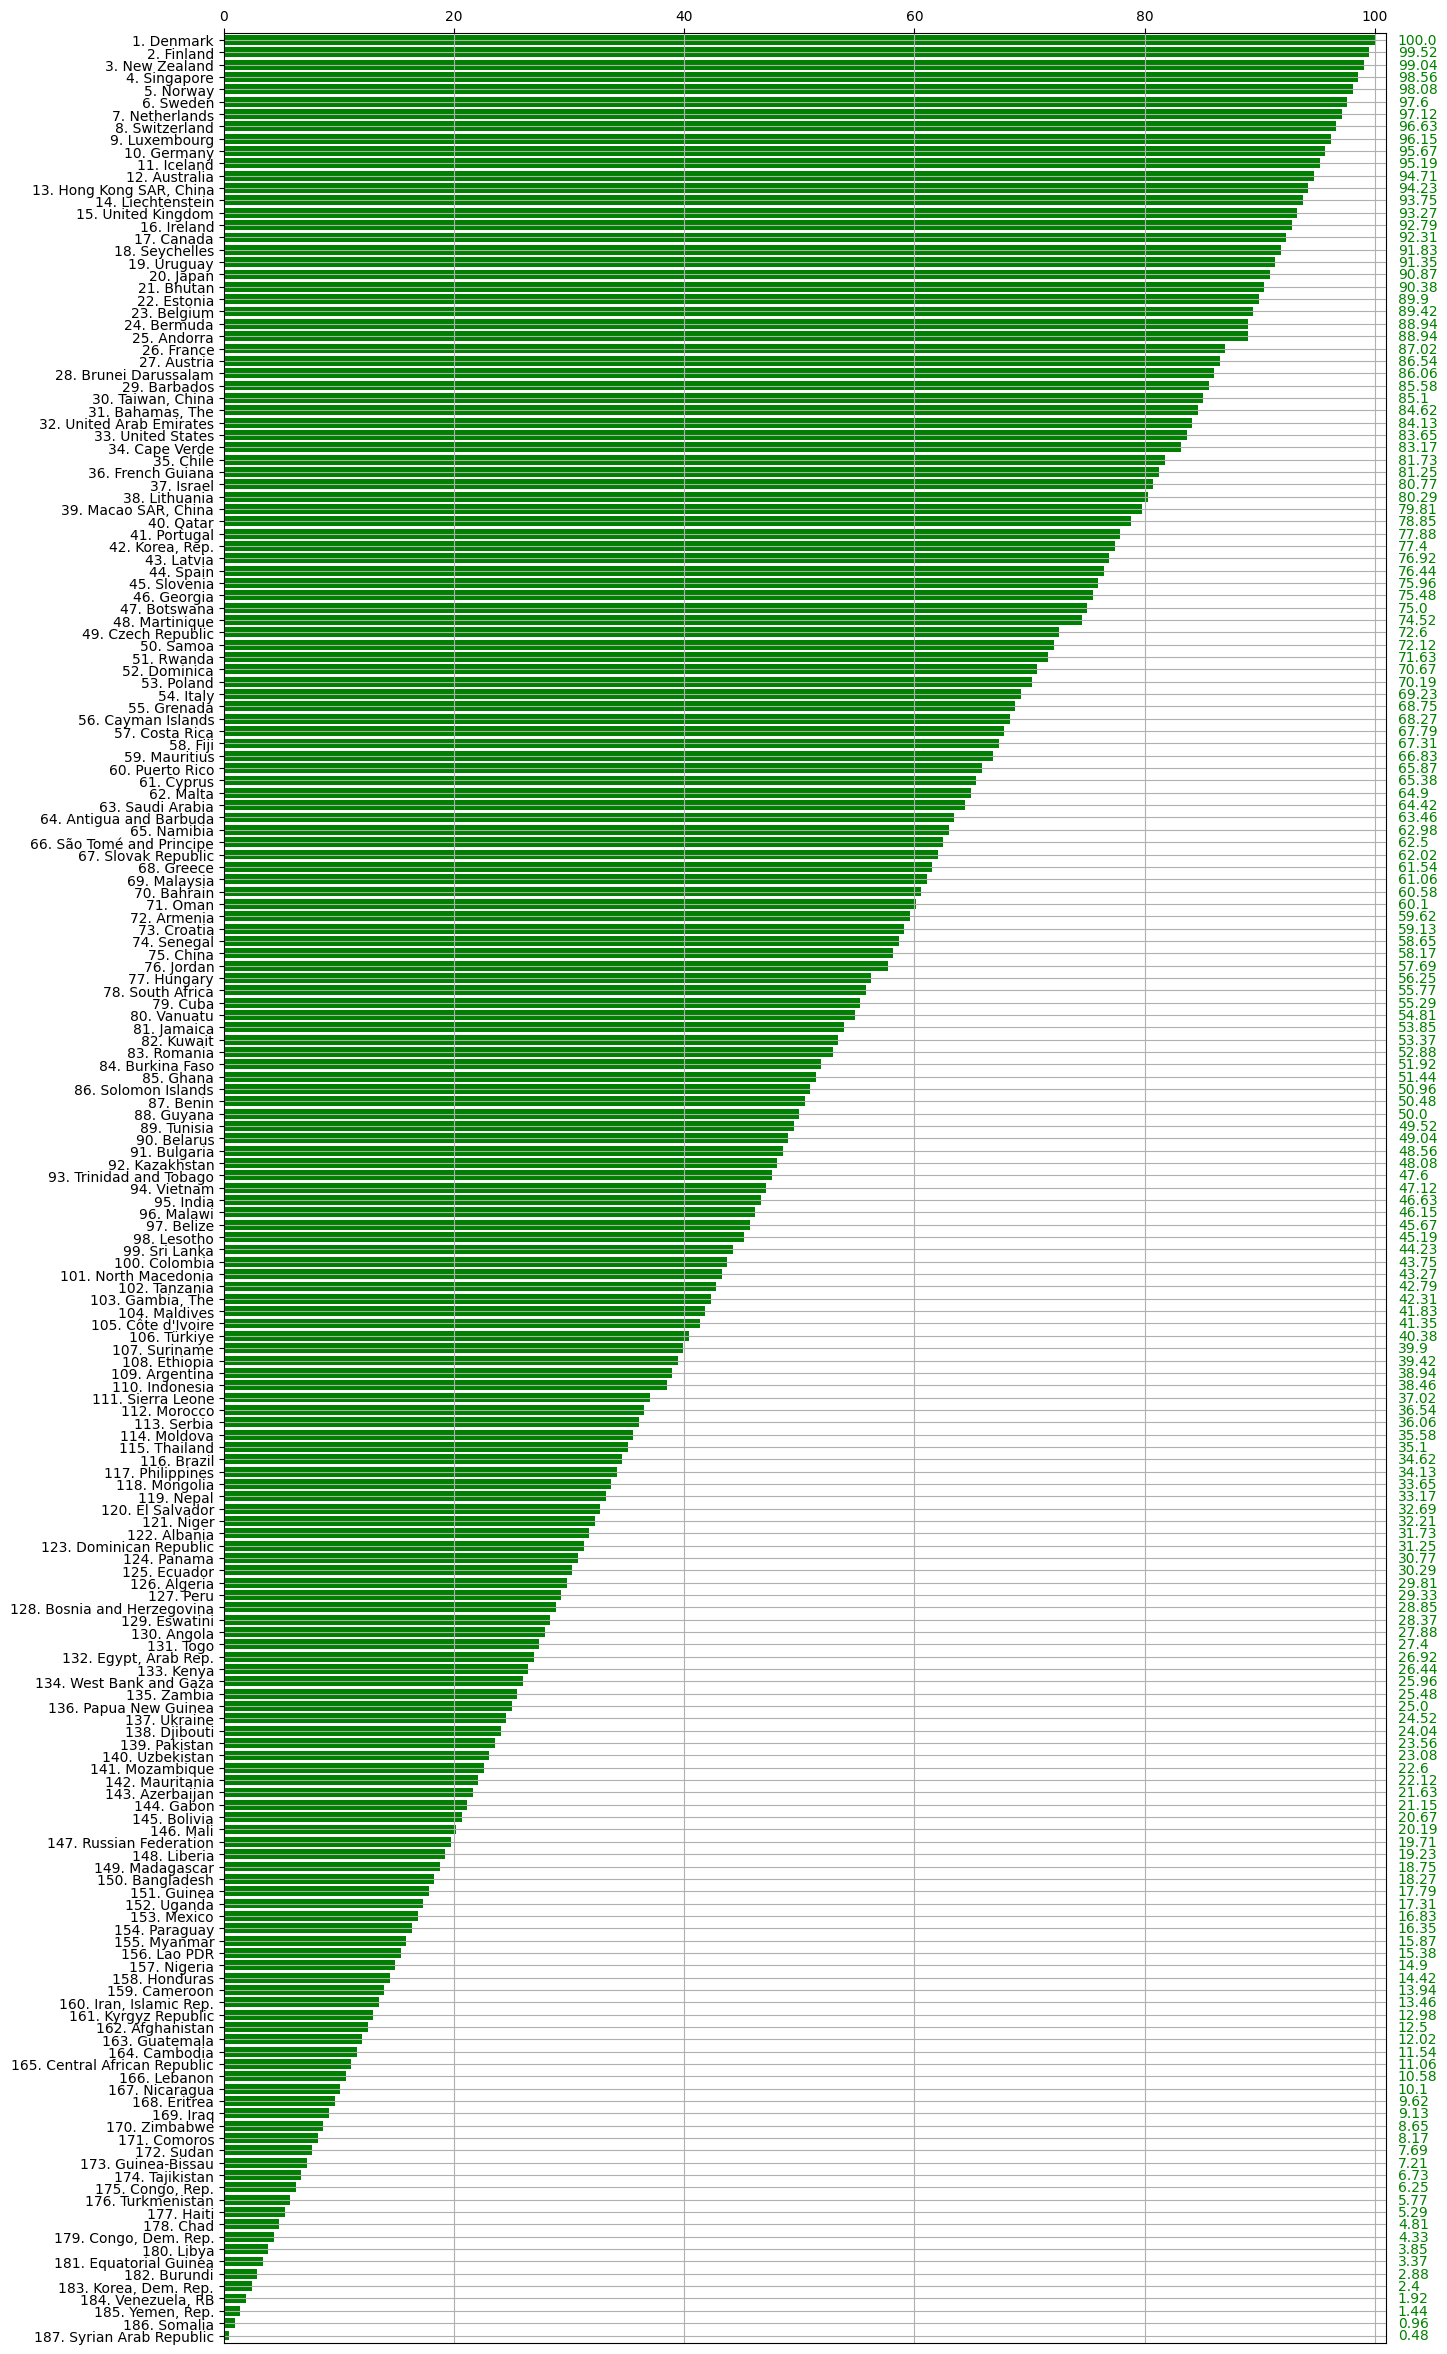

In [7]:
# Сортировка по WGI за 2021 год и пропуск пустых значений
df_wgi2021 = df_pokozateli.sort_values([(2021, 'Rank')], ascending=1).dropna()
df_wgi= df_wgi2021[(2021, 'Rank')]
df_country= df_wgi2021.index.to_series().apply(lambda x: '{0}'.format(*x))
# добавить номер у страны
for i in range(df_country.size):
     df_country[i] =str(df_country.size-i)+ ". "+str(df_country[i]) 
plt.figure("1", figsize=[15,30])
ax = plt.subplot(1,1,1)
ax.xaxis.tick_top()
plt.margins(0.001)
plt.barh(df_country, df_wgi, color='green')
plt.xlim(0, 101)
plt.grid(True)
# отображение rank для каждой страны
for i, v in enumerate(sorted(df_wgi)):
    plt.text(102, i, str(round(v, 2)), color='green', va="center")
  
    

4.Формирование DataFrame'a из исходного для региона в соответствии с вариантом (Middle East and North Africa)

In [8]:
# вывод данных, где Region=MENA и Code в таблице regions = Code в таблице wgidataset
df_pokozateli = df_wgidataset[df_wgidataset.index.get_level_values(1).isin(regions[regions['Region'] == 'MENA']['Code'])]


5.Вывод данные DataFrame'a

In [9]:
df_pokozateli

1996                                         \
Code                      Estimate    StdErr NumSrc       Rank      Lower   
United Arab Emirates ARE -0.005579  0.312212    3.0  57.526882  35.483871   
Bahrain              BHR  0.328689  0.312212    3.0  63.978493  50.537636   
Algeria              DZA -0.566741  0.262077    4.0  33.333332  16.666666   
Egypt, Arab Rep.     EGY -0.472254  0.244907    5.0  38.709679  19.892473   
Iran, Islamic Rep.   IRN -0.480607  0.262077    4.0  37.634407  18.817204   
Iraq                 IRQ -1.602183  0.262077    4.0   0.537634   0.000000   
Israel               ISR  1.354008  0.210325    6.0  88.172043  81.182793   
Jordan               JOR -0.035407  0.244907    5.0  55.376343  39.784946   
Kuwait               KWT  0.478682  0.262077    4.0  70.430107  59.139786   
Lebanon              LBN -0.659695  0.262077    4.0  31.182796  13.978495   
Libya                LBY -0.871937  0.262077    4.0  20.430107   3.763441   
Morocco              MAR -0.106927  0.262077    4.0  53.225807  34.946236   
Oman                 OMN  0.414642  0.262077    4.0  67.741936  56.989246   
Qatar                QAT -0.045596  0.262077    4.0  54.838711  37.634407   
Saudi Arabia         SAU -0.163303  0.262077    4.0  51.075268  32.258064   
Syrian Arab Republic SYR -0.881176  0.262077    4.0  19.892473   3.763441   
Tunisia              TUN -0.533678  0.262077    4.0  35.483871  17.741936   
Yemen, Rep.          YEM -0.743732  0.262077    4.0  27.419355   8.602151   

                                         1998                              \
Code                          Upper  Estimate    StdErr NumSrc       Rank   
United Arab Emirates ARE  72.043015  0.033033  0.260451    3.0  55.614975   
Bahrain              BHR  77.419357  0.250789  0.260451    3.0  62.032085   
Algeria              DZA  52.688171 -0.916649  0.227055    4.0  22.994652   
Egypt, Arab Rep.     EGY  53.763439 -0.477870  0.198134    5.0  39.037434   
Iran, Islamic Rep.   IRN  54.301075 -0.460588  0.227055    4.0  40.106953   
Iraq                 IRQ   9.139785 -1.422613  0.227055    4.0   0.534759   
Israel               ISR  91.397850  1.148573  0.188628    6.0  83.422462   
Jordan               JOR  65.053764  0.112762  0.198134    5.0  59.358288   
Kuwait               KWT  80.645164  0.562503  0.227055    4.0  71.122993   
Lebanon              LBN  49.462364 -0.474878  0.227055    4.0  39.572193   
Libya                LBY  39.247311 -0.907353  0.227055    4.0  24.064171   
Morocco              MAR  63.440861  0.103346  0.227055    4.0  58.288769   
Oman                 OMN  77.419357  0.724727  0.227055    4.0  74.866310   
Qatar                QAT  66.129036  0.474643  0.227055    4.0  67.914436   
Saudi Arabia         SAU  62.903225 -0.263509  0.227055    4.0  48.663101   
Syrian Arab Republic SYR  38.709679 -0.914690  0.227055    4.0  23.529411   
Tunisia              TUN  53.225807 -0.433108  0.227055    4.0  41.711231   
Yemen, Rep.          YEM  47.311829 -0.998175  0.227055    4.0  17.112299   

                          ...   2020                                   \
Code                      ... NumSrc       Rank      Lower      Upper   
United Arab Emirates ARE  ...    7.0  83.173080  79.807693  88.461540   
Bahrain              BHR  ...    5.0  53.365383  39.903847  62.019230   
Algeria              DZA  ...    6.0  27.884615  18.269230  42.788460   
Egypt, Arab Rep.     EGY  ...    9.0  24.038462  15.865385  32.211540   
Iran, Islamic Rep.   IRN  ...    9.0  13.942307   7.211538  21.153847   
Iraq                 IRQ  ...    7.0   9.134615   1.923077  16.346153   
Israel               ISR  ...    7.0  69.711540  62.500000  79.807693   
Jordan               JOR  ...   10.0  59.134617  47.115383  63.461540   
Kuwait               KWT  ...    6.0  53.846153  40.865383  62.019230   
Lebanon              LBN  ...   10.0  12.019231   6.730769  18.750000   
Libya                LBY  ...    7.0   2.884615   0.000000  10.096154   

6.Построение графиков индекса WGI за 1996-2021 для стран своего региона (estimate). 

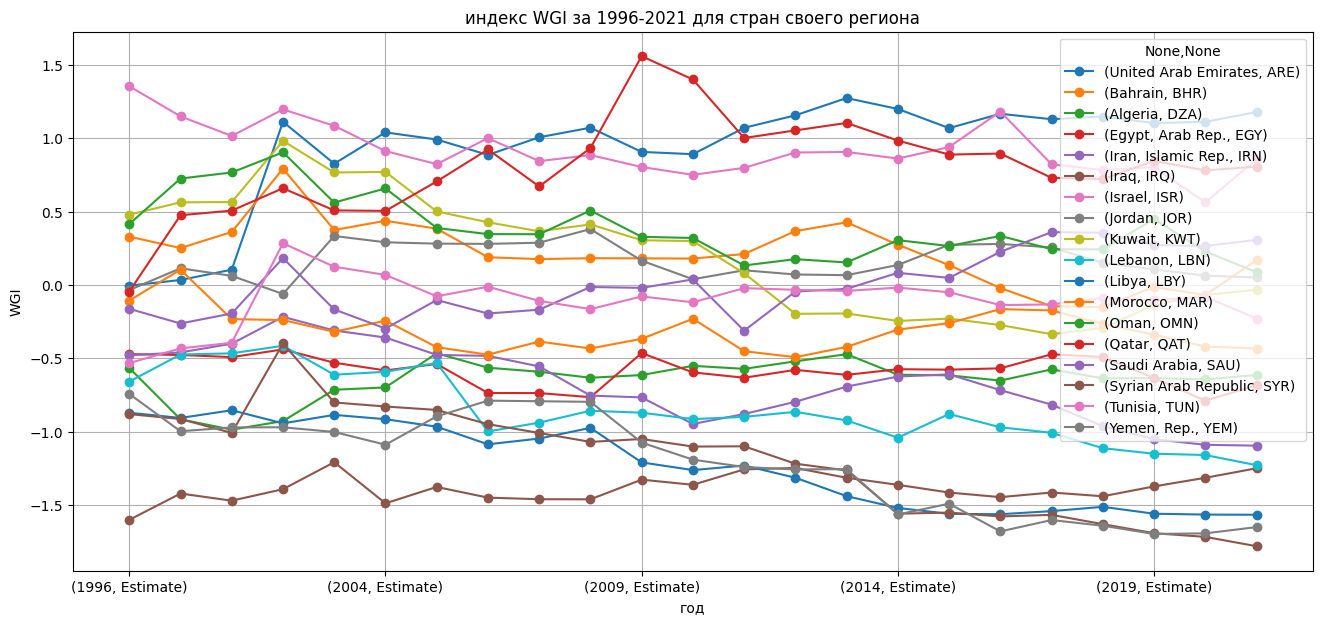

In [10]:
fig, ax = plt.subplots(figsize=[10,7])
ax2 = df_pokozateli.filter(regex='Estimate').T.plot( ax=ax, figsize=(16, 7), grid = True, marker="o", title="индекс WGI за 1996-2021 для стран своего региона" )
ax.set_title('индекс WGI за 1996-2021 для стран своего региона')
ax.set_xlabel('год')
ax.set_ylabel('WGI')
plt.plot(ax=ax2)
plt.show()

7.Найти страны с наибольшим и наименьшим значением WGI Вашего варианта региона за 2021 год (estimate)

Страна с наименьшим значением WGI:

In [11]:
df_pokozateli[(2021, 'Estimate')].nsmallest(1)

Syrian Arab Republic  SYR   -1.781923
Name: (2021, Estimate), dtype: float64

Страна с наименьшим значением WGI:

In [12]:
df_pokozateli[(2021, 'Estimate')].nlargest(1)

United Arab Emirates  ARE    1.178225
Name: (2021, Estimate), dtype: float64

8.Определение среднего значения региона за каждый год в период с 1996 по 2021 (estimate) 

In [13]:
df_pokozateli.filter(regex='Estimate').mean()

      Code    
1996  Estimate   -0.255155
1998  Estimate   -0.214392
2000  Estimate   -0.227920
2002  Estimate    0.005365
2003  Estimate   -0.110138
2004  Estimate   -0.134619
2005  Estimate   -0.146972
2006  Estimate   -0.205434
2007  Estimate   -0.228394
2008  Estimate   -0.197921
2009  Estimate   -0.200338
2010  Estimate   -0.242790
2011  Estimate   -0.289805
2012  Estimate   -0.269579
2013  Estimate   -0.263348
2014  Estimate   -0.310855
2015  Estimate   -0.312984
2016  Estimate   -0.316696
2017  Estimate   -0.347600
2018  Estimate   -0.379894
2019  Estimate   -0.378902
2020  Estimate   -0.422824
2021  Estimate   -0.395649
dtype: float64

9.Построение графика индекса WGI за 1996-2021 для стран своего региона и выделите страны с наибольшим и наименьшим значением WGI за 2021 год, а также отобразите среднее значение по региону и РФ.

In [14]:
# РФ
df_rf = df_wgidataset[df_wgidataset.index.get_level_values(0)=='Russian Federation']
# min
df_min = df_wgidataset[df_wgidataset.index.get_level_values(0)== df_pokozateli[(2021, 'Estimate')].nsmallest(1).index.get_level_values(0)[0]]
#max
df_max = df_wgidataset[df_wgidataset.index.get_level_values(0)== df_pokozateli[(2021, 'Estimate')].nlargest(1).index.get_level_values(0)[0]]
# объединение min, max, РФ
df14 = pd.concat([df_rf.filter(regex='Estimate'), df_min.filter(regex='Estimate'), df_max.filter(regex='Estimate')])
# добавление mean
df15 = df14.append(df_pokozateli.filter(regex='Estimate').mean(), ignore_index=True)
#добавление индекса
df15.index=['Russia', 'min', 'max', 'mean']



/var/folders/ry/nnh_14ds2g5g8gwzh506qg0c0000gn/T/ipykernel_6409/1857091582.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df15 = df14.append(df_pokozateli.filter(regex='Estimate').mean(), ignore_index=True)


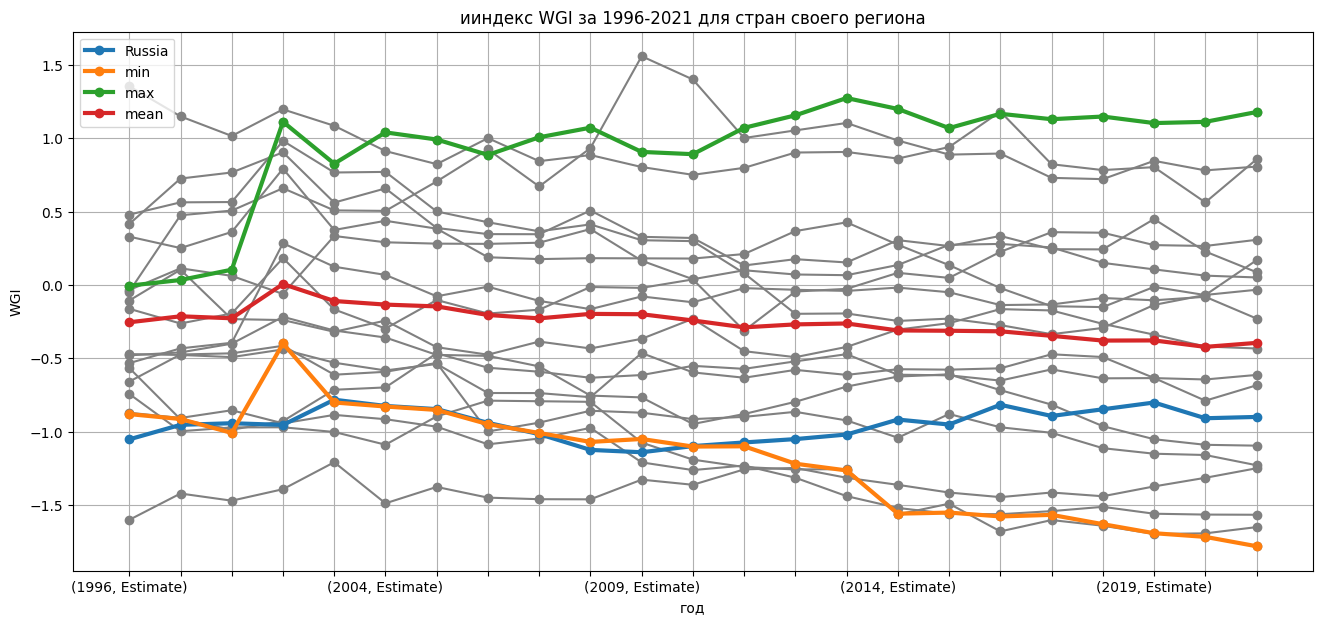

In [15]:
ax = df_pokozateli.filter(regex='Estimate').T.plot( figsize=(16, 7), grid = True, marker="o", color='grey', legend=False)
ax2 = df15.T.plot(marker='o', ax=ax, legend=['Russia', 'min', 'max', 'mean'], grid = True, linewidth= 3).set_xticks(range(0, 23))
ax.set_title('ииндекс WGI за 1996-2021 для стран своего региона')
ax.set_xlabel('год')
ax.set_ylabel('WGI')
plt.plot(ax=ax2)
plt.show()


11.Определение, как изменилось значение показателя в соответствии с Вашим вариантом с 1996 по 2021 (rank)

**Вариант 1.** На сколько позиций в рейтинге c 1996 по 2021

rank с 1996 по 2021 изменился на:

In [16]:
df_11 = df_pokozateli[(2021, 'Rank')] - df_pokozateli[(1996, 'Rank')]
# округление
np.ceil(df_11.mean())

-4.0

12.Вывод таблицы для Вашего варианта (WGI - rank)

In [17]:
# Средние значения Rank для всех лет
df_mean_rank = df_pokozateli.filter(regex='Rank').mean()
# Установка названий столбцов для таблицы
df_table = pd.DataFrame(columns=['Регион', 'Страна', 'WGI 1996', 'WGI 2021', 'Изменение'])
s = 'MENA'
r = 'ECA'
# добавление строк в таблицу
df_table.loc['mean_2021'] = [s, None, df_mean_rank[(1996, 'Rank')], df_mean_rank[(2021, 'Rank')],df_11.mean()]
df_table.loc['max_2021'] = [ s, df_max.index.get_level_values(0)[0],  df_max[(1996, 'Rank')][0], df_max[(2021, 'Rank')][0], df_max[(2021, 'Rank')][0]-df_max[(1996, 'Rank')][0]]
df_table.loc['min_2021'] = [s, df_min.index.get_level_values(0)[0], df_min[(1996, 'Rank')][0], df_min[(2021, 'Rank')][0], df_min[(2021, 'Rank')][0]-df_min[(1996, 'Rank')][0]]
df_table.loc['Russia_2021'] = [r, df_rf.index.get_level_values(0)[0], df_rf[(1996, 'Rank')][0], df_rf[(2021, 'Rank')][0], df_rf[(2021, 'Rank')][0]-df_rf[(1996, 'Rank')][0]]
df_table


,Регион,Страна,WGI 1996,WGI 2021,Изменение
mean_2021,MENA,None,44.832736,40.090812,-4.741924
max_2021,MENA,United Arab Emirates,57.526882,84.134613,26.607731
min_2021,MENA,Syrian Arab Republic,19.892473,0.480769,-19.411704
Russia_2021,ECA,Russian Federation,15.053763,19.711538,4.657775


13.Отображение диаграммы размаха (boxplot) индекса WGI за 2021 для всех стран и для каждого региона в отдельности (на одном графике) (estimate)

In [18]:
# выделение всех регионов
df_mena = df_wgidataset[df_wgidataset.index.get_level_values(1).isin(regions[regions['Region'] == 'MENA']['Code'])]
df_ame = df_wgidataset[df_wgidataset.index.get_level_values(1).isin(regions[regions['Region'] == 'AME']['Code'])]
df_eca = df_wgidataset[df_wgidataset.index.get_level_values(1).isin(regions[regions['Region'] == 'ECA']['Code'])]
df_ap = df_wgidataset[df_wgidataset.index.get_level_values(1).isin(regions[regions['Region'] == 'AP']['Code'])]
df_ssa = df_wgidataset[df_wgidataset.index.get_level_values(1).isin(regions[regions['Region'] == 'SSA']['Code'])]
df_weeu = df_wgidataset[df_wgidataset.index.get_level_values(1).isin(regions[regions['Region'] == 'WE/EU']['Code'])]

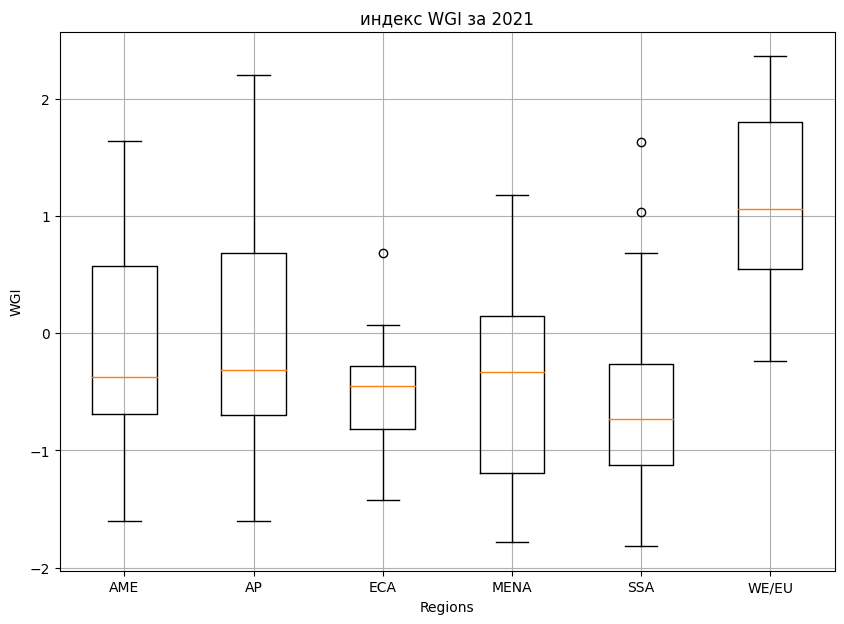

In [19]:
# создаем фигуру и оси
fig, ax = plt.subplots(figsize=[10,7])
# строим boxplot для каждой серии данных
ax.boxplot([df_ame[(2021, 'Estimate')], df_ap[(2021, 'Estimate')], df_eca[(2021, 'Estimate')], df_mena[(2021, 'Estimate')], df_ssa[(2021, 'Estimate')], df_weeu[(2021, 'Estimate')]])
# задаем метки для оси x
ax.set_xticklabels(['AME', 'AP', 'ECA', 'MENA', 'SSA', 'WE/EU'])
# добавляем заголовок и метки для осей
ax.set_title('индекс WGI за 2021')
ax.set_xlabel('Regions')
ax.set_ylabel('WGI')
plt.grid()
# отображаем график
plt.show()

### Задание 2. Анализ рынка акций 

1.Загрузка данных в один dataframe из всех файлов в папке /data/stock. Все файлы имеют одинаковую структуру, в том числе наименование столбцов. В качестве значений индекса dataframe'а необходимо указать значения столбца "Date". Название столбцов должные соответствовать названию акций (имя файла без .csv), а их значения - значениям цены закрытия (столбец "Close" в файлах .csv)


In [20]:
folder = "stock/"
files = os.listdir(folder)

df = pd.DataFrame()

for file in files:
    if file.endswith(".csv"):
        # определяем имя акции из названия файла
        name = file.split(".")[0]

        # загружаем данные из файла
        file_path = os.path.join(folder, file)
        data = pd.read_csv(file_path)

        # преобразуем данные и добавляем столбец с именем акции
        data["Date"] = pd.to_datetime(data["Date"])
        data.set_index("Date", inplace=True)
        data = data[["Close"]]
        data.columns = [name]

        # добавляем данные в основной DataFrame
        if df.empty:
            df = data
        else:
            df = df.join(data, how="outer")


Получившийся dataframe

In [21]:
df

,RHT,ADBE,YHOO,CA,CHKP,EBAY,INTU,ADSK,PYPL,BIDU,...,FB,TWTR,VMW,AKAM,GOOGL,INFY,BABA,CTSH,SAP,CRM
Date,,,,,,,,,,,,,,,,,,,,,
2015-03-02,75.750000,73.940002,44.439999,32.610001,81.970001,57.680000,96.959999,58.639999,NaN,NaN,...,82.220001,50.080002,82.010002,71.050003,554.700012,35.080002,83.239998,62.389999,72.169998,66.809998
2015-04-01,75.260002,76.059998,42.570000,31.770000,83.480003,58.259998,100.330002,56.830002,NaN,NaN,...,78.769997,38.959999,88.099998,73.779999,548.770020,30.980000,81.290001,58.540001,75.690002,72.820000
2015-05-01,77.269997,79.089996,42.939999,30.450001,84.720001,61.359997,104.150002,54.150002,NaN,NaN,...,79.190002,36.669998,87.320000,76.269997,545.320007,31.870001,89.320000,64.720001,73.900002,72.750000
2015-06-01,75.930000,81.010002,39.290001,29.290001,79.550003,60.239998,100.769997,50.080002,NaN,NaN,...,85.769997,36.220001,85.739998,69.820000,540.039978,15.850000,82.269997,61.090000,70.230003,69.629997
2015-07-01,79.080002,81.989998,36.669998,29.139999,80.769997,28.120001,105.769997,50.580002,NaN,NaN,...,94.010002,31.010000,89.129997,76.709999,657.500000,16.910000,78.339996,63.099998,71.669998,73.300003
2015-07-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.700001,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-03,72.209999,78.570000,32.240002,27.290001,78.010002,27.110001,85.750000,46.750000,35.000000,NaN,...,89.430000,27.790001,79.150002,71.309998,647.820007,17.150000,66.120003,62.939999,67.260002,69.360001
2015-09-01,71.879997,82.220001,28.910000,27.299999,79.330002,24.440001,88.750000,44.139999,31.040001,NaN,...,89.900002,26.940001,78.790001,69.059998,638.369995,19.090000,58.970001,62.610001,64.790001,69.430000
2015-10-01,79.110001,88.660004,35.619999,27.709999,84.940002,27.900000,97.430000,55.189999,36.009998,NaN,...,101.970001,28.459999,60.150002,60.820000,737.390015,18.160000,83.830002,68.110001,78.709999,77.709999


2.корреляционная матрица для всех акций

In [22]:
df.corr()

,RHT,ADBE,YHOO,CA,CHKP,EBAY,INTU,ADSK,PYPL,BIDU,...,FB,TWTR,VMW,AKAM,GOOGL,INFY,BABA,CTSH,SAP,CRM
RHT,1.000000,0.295120,0.397975,0.065133,0.310665,0.161196,0.306462,0.422972,0.260888,0.226945,...,0.127020,0.153412,0.292572,0.123779,0.184321,-0.029536,0.556812,0.017098,0.301397,0.493769
ADBE,0.295120,1.000000,0.394537,0.470015,0.472383,-0.438998,0.805904,0.853387,0.815057,0.032627,...,0.945377,-0.744648,0.007322,-0.351316,0.882737,-0.644775,0.714708,-0.639420,0.903788,0.534918
YHOO,0.397975,0.394537,1.000000,0.719633,0.386979,0.543315,0.712311,0.690366,0.797737,0.017444,...,0.242244,0.189875,0.619268,0.337245,0.030759,0.248663,0.845418,-0.445205,0.542135,0.231736
CA,0.065133,0.470015,0.719633,1.000000,0.019126,0.176644,0.718292,0.527015,0.563574,-0.652263,...,0.471026,-0.177609,0.216074,-0.161597,0.258513,0.085652,0.594163,-0.556713,0.609354,0.335133
CHKP,0.310665,0.472383,0.386979,0.019126,1.000000,0.010033,0.509061,0.625147,0.459489,0.159641,...,0.315623,-0.190570,0.220590,0.183522,0.317104,-0.083422,0.429195,-0.044107,0.430469,0.349589
EBAY,0.161196,-0.438998,0.543315,0.176644,0.010033,1.000000,-0.029323,-0.053116,0.451863,-0.190022,...,-0.591459,0.801031,0.587035,0.562100,-0.714192,0.703138,0.198884,0.125003,-0.217757,-0.264918
INTU,0.306462,0.805904,0.712311,0.718292,0.509061,-0.029323,1.000000,0.832712,0.750377,-0.461108,...,0.697724,-0.439487,0.323059,-0.034693,0.552273,-0.324549,0.800199,-0.546619,0.806879,0.492148
ADSK,0.422972,0.853387,0.690366,0.527015,0.625147,-0.053116,0.832712,1.000000,0.798648,0.016605,...,0.710084,-0.374832,0.317948,-0.018722,0.655533,-0.322194,0.873751,-0.617152,0.874067,0.387552
PYPL,0.260888,0.815057,0.797737,0.563574,0.459489,0.451863,0.750377,0.798648,1.000000,0.389159,...,0.850378,-0.609176,0.289105,0.015839,0.756846,-0.566059,0.783197,-0.666766,0.819823,0.148632
BIDU,0.226945,0.032627,0.017444,-0.652263,0.159641,-0.190022,-0.461108,0.016605,0.389159,1.000000,...,0.160983,-0.027082,-0.287513,-0.215394,-0.203350,0.378583,0.056031,-0.110644,-0.055597,-0.046956


3.Отображение корреляционной матрицы в виде диаграммы

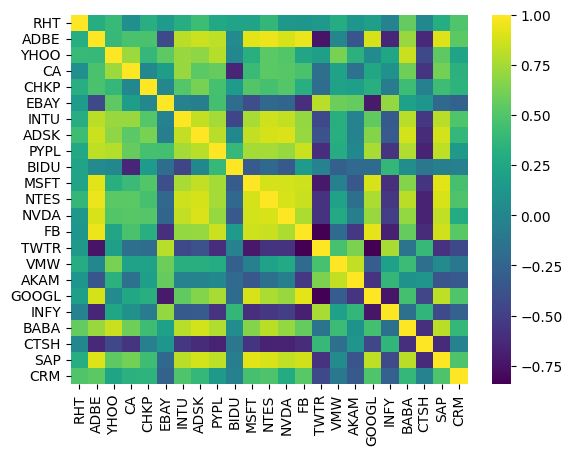

In [23]:
sn.heatmap(df.corr(), cmap='viridis')
plt.show()

4.В соответствии с Вашим вариантом определить:
- акцию с максимальной положительной корреляцией (max)
- акцию с максимальной отрицательной корреляцией (min)
- акцию с минимальной корреляцией (которая больше всего соответствует отсутствию какой-либо корреляции (none)

Акция с максимальной положительной корреляцией (max):

In [24]:
df_max = df.corr()['MSFT'].nlargest(2)
print(df_max.index[1], df_max[1])

SAP 0.9194009751940979


Акция с максимальной отрицательной корреляцией (min):

In [25]:
df_min = df.corr()['MSFT'].nsmallest(2)
print(df_min.index[1], df_min[1])

INFY -0.5960656052791912


Акция с минимальной корреляцией (которая больше всего соответствует отсутствию какой-либо корреляции (none):

In [26]:
df_none = abs(df.corr()['MSFT']).nsmallest(1)
df_none

VMW    0.048717
Name: MSFT, dtype: float64

5.Диаграммы разброса (Ваша компания - Компания с min), (Ваша компания - Компания с max), (Ваша компания - Компания с none)

1. Ваша компания - Компания с min:

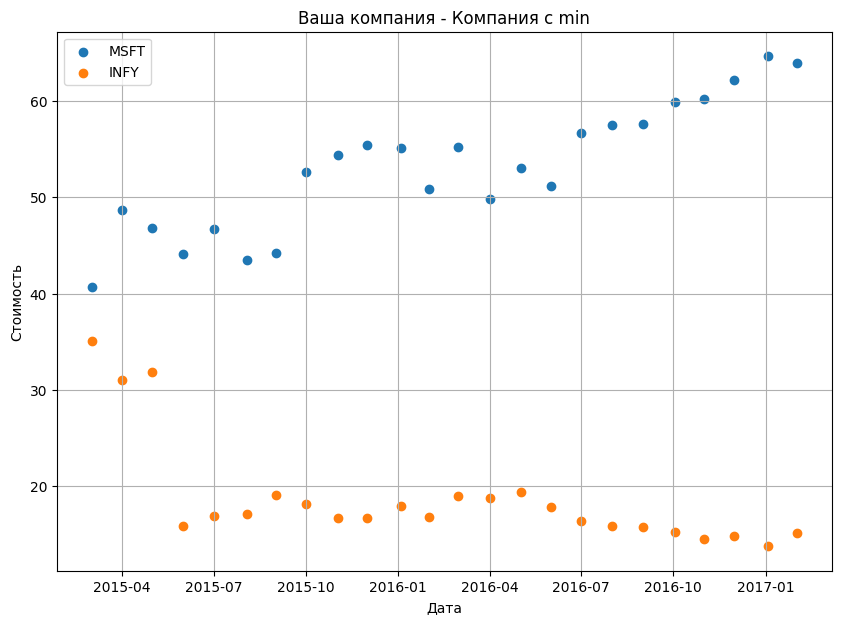

In [27]:
fig, ax = plt.subplots(figsize=[10,7])
ax.set_title('Ваша компания - Компания с min')
ax.set_xlabel('Дата')
ax.set_ylabel('Стоимость')
# постороение разброса для MSFT
plt.scatter(df['MSFT'].index, df['MSFT'])
# постоение разброса для акции с максимальной отрицательной корреляцией
plt.scatter(df[df_min.index[1]].index, df[df_min.index[1]])
plt.grid()
plt.legend(labels=['MSFT', df_min.index[1]])
plt.show()

2. Ваша компания - Компания с max:

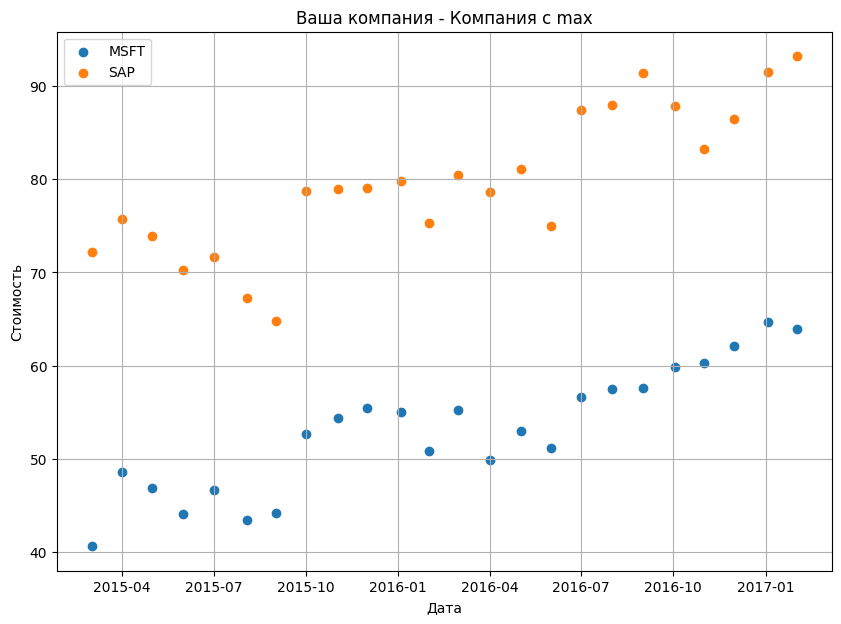

In [28]:
fig, ax = plt.subplots(figsize=[10,7])
ax.set_title('Ваша компания - Компания с max')
ax.set_xlabel('Дата')
ax.set_ylabel('Стоимость')
plt.scatter(df['MSFT'].index, df['MSFT'])
# постоение разброса для акции с максимальной положительной корреляцией
plt.scatter(df[df_max.index[1]].index, df[df_max.index[1]])
plt.grid()
plt.legend(labels=['MSFT', df_max.index[1]])
plt.show()

3. Ваша компания - Компания с none:

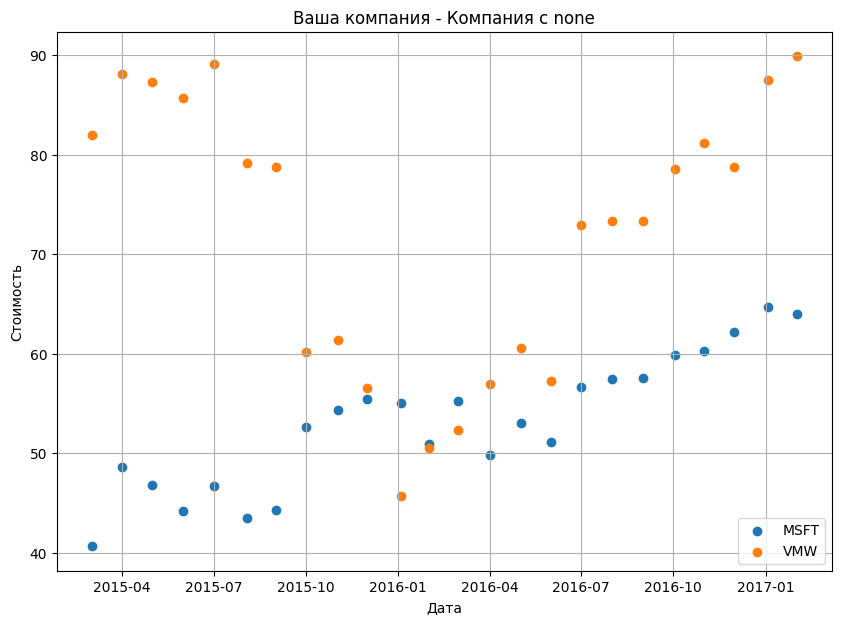

In [29]:
fig, ax = plt.subplots(figsize=[10,7])
ax.set_title('Ваша компания - Компания с none')
ax.set_xlabel('Дата')
ax.set_ylabel('Стоимость')
plt.scatter(df['MSFT'].index, df['MSFT'])
# постоение разброса для акции с минимальной корреляцией
plt.scatter(df[df_none.index[0]].index, df[df_none.index[0]])
plt.grid()
plt.legend(labels=['MSFT', df_none.index[0]])
plt.show()

6.Рассчет средней цены акций для каждого месяца (исходные данные взяты с интервалом в месяц)

In [30]:
# групировка по дате и получение среднего значения
df_mean = df.ffill().groupby(by=df.index).mean()
df_mean.mean(axis=1)

Date
2015-03-02     88.030001
2015-04-01     89.109049
2015-05-01     90.564762
2015-06-01     87.711903
2015-07-01     92.813333
2015-07-06     90.353636
2015-08-03     84.474546
2015-09-01     83.863182
2015-10-01     94.246365
2015-11-02     97.221363
2015-12-01     97.331364
2016-01-04     91.659999
2016-02-01     88.829090
2016-03-01     95.410456
2016-03-02     99.561306
2016-04-01     96.432609
2016-05-02    101.787825
2016-06-01     98.156523
2016-07-01    105.233915
2016-08-01    107.825217
2016-09-01    111.394783
2016-10-03    112.875653
2016-11-01    109.284782
2016-12-01    109.423044
2017-01-03    117.401739
2017-02-01    122.210869
dtype: float64

7.Построение графика для акций из пункта 4 и средней из пункта

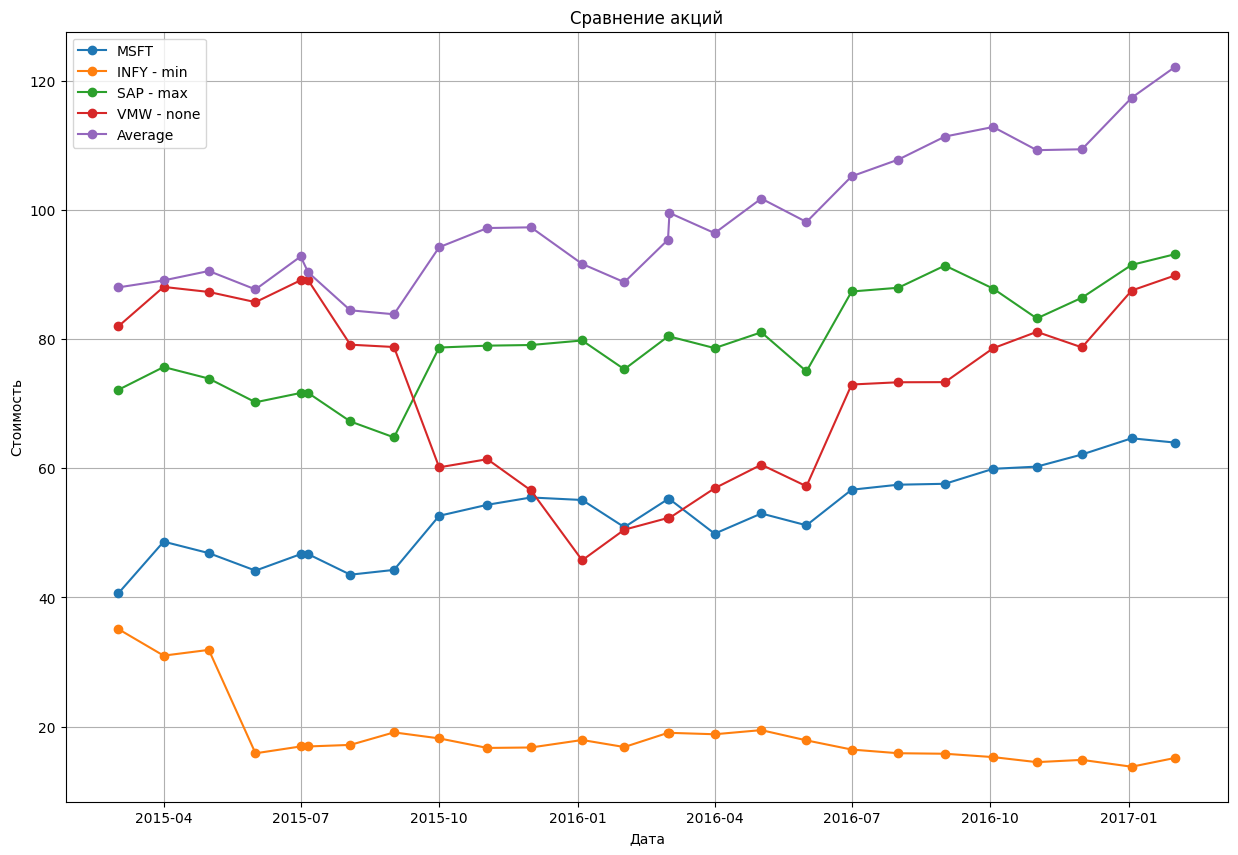

In [31]:
fig, ax = plt.subplots(figsize=[15,10])
# Построение линий
plt.plot(df['MSFT'].index, df['MSFT'].ffill(), "-o")
plt.plot(df[df_min.index[1]].index, df[df_min.index[1]].ffill(), "-o")
plt.plot(df[df_max.index[1]].index, df[df_max.index[1]].ffill(), "-o")
plt.plot(df[df_none.index[0]].index, df[df_none.index[0]].ffill(), "-o")
plt.plot(df_mean.mean(axis=1).index, df_mean.mean(axis=1).ffill(), "-o")
plt.grid(True)
ax.set_title('Сравнение акций')
ax.set_xlabel('Дата')
ax.set_ylabel('Стоимость')
plt.legend(labels=['MSFT', f"{df_min.index[1]} - min", f"{df_max.index[1]} - max", f"{df_none.index[0]} - none", 'Average'])
plt.show()